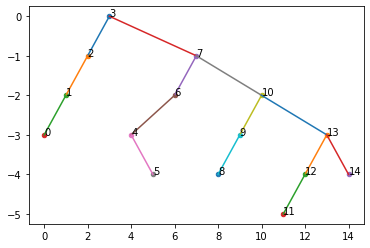

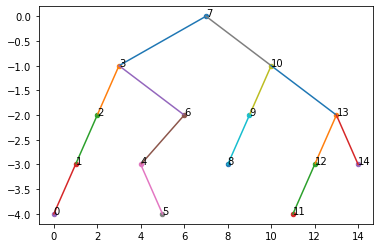

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class TreeNode(object):
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.inorder_pos = 0
    
    def add(self, key):
        if key < self.key:
            if self.left:
                self.left.add(key)
            else:
                self.left = TreeNode(key)
        elif key > self.key:
            if self.right:
                self.right.add(key)
            else:
                self.right = TreeNode(key)
    
    def rotate_cw(self, key):
        """
        Rotate the tree clockwise about a node
        
        Parameters
        ----------
        key: object with a total order
            Object at the root where the rotation will be performed
        """
        ret = self
        if self.left and key < self.key:
            self.left = self.left.rotate_cw(key)
        elif self.right and key > self.key:
            self.right = self.right.rotate_cw(key)
        elif key == self.key:
            x = self.left
            assert(x)
            B = x.right
            self.left = B
            x.right = self
            ret = x
        return ret
            
    def rotate_ccw(self, key):
        """
        Rotate the tree counter-clockwise about a node
        
        Parameters
        ----------
        key: object with a total order
            Object at the root where the rotation will be performed
        """
        ret = self
        if self.left and key < self.key:
            self.left = self.left.rotate_ccw(key)
        elif self.right and key > self.key:
            self.right = self.right.rotate_ccw(key)
        elif key == self.key:
            y = self.right
            assert(y)
            B = y.left
            y.left = self
            self.right = B
            ret = y
        return ret
    
    def inorder(self, num, key_list):
        """
        Parameters
        ----------
        num: list
            List of a single element which keeps 
            track of the number I'm at
        """
        if self.left:
            self.left.inorder(num, key_list)
        self.inorder_pos = num[0]
        key_list.append(self.key)
        num[0] += 1
        if self.right:
            self.right.inorder(num, key_list)
    
    def draw(self, y):
        x = self.inorder_pos
        plt.scatter([x], [y], 20)
        plt.text(x, y, "{}".format(self.key))
        y_next = y-1
        if self.left:
            x_next = self.left.inorder_pos
            plt.plot([x, x_next], [y, y_next])
            self.left.draw(y_next)
        if self.right:
            x_next = self.right.inorder_pos
            plt.plot([x, x_next], [y, y_next])
            self.right.draw(y_next)
        
        
class BinaryTree(object):
    def __init__(self):
        self.root = None
    
    def inorder(self):
        key_list = []
        if self.root:
            self.root.inorder([0], key_list)
        return key_list
    
    def draw(self):
        self.inorder()
        if self.root:
            self.root.draw(0)
    
    def add(self, key):
        if self.root:
            self.root.add(key)
        else:
            self.root = TreeNode(key)
    
    def rotate_cw(self, key):
        if self.root:
            self.root = self.root.rotate_cw(key)

    def rotate_ccw(self, key):
        if self.root:
            self.root = self.root.rotate_ccw(key)

T = BinaryTree()
np.random.seed(1)
for x in np.random.permutation(15):
    T.add(x)
plt.figure()
T.draw()

T.rotate_ccw(3)
plt.figure()
T.draw()